In [1]:
import netCDF4 as nc
import pandas as pd
from netCDF4 import Dataset
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#tf.random.set_seed(7)
#tf.random.set_seed(77)

In [2]:
nc_f    = './icecon.APPX.Bering_Strait.nc'
#nc_f    = './icecon.APPX.90N.135W.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['record'][:]

In [3]:
sic    = nc_fid.variables['icecon'][:,0,0]

In [4]:
split = int(0.8 * len(sic))
sic_train  = sic[: split - 1]
sic_test   = sic[split:]
time_train = time[: split - 1]
time_test  = time[split:]

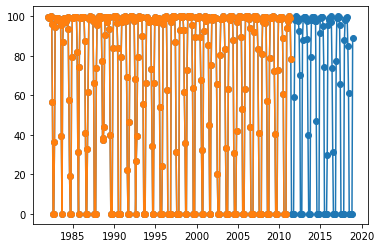

In [5]:
plt.plot(time,sic,'-o')
plt.plot(time_train,sic_train,'-o')

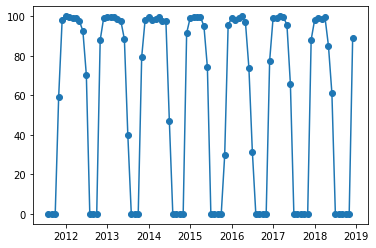

In [6]:
plt.plot(time_test,sic_test,'-o')

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)

In [8]:
n_steps = 12
X,y = split_sequence(sic,n_steps)
print(X.shape)
print(y.shape)

(432, 12)
(432,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[0:5,:])

[[ 0.7835263   0.77645147  0.7740664   0.78851914  0.79336095  0.7032374
  -0.24216641 -1.6006358  -1.6006358  -0.7299935   0.6711515   0.78458065]
 [ 0.7763185   0.7740485   0.7884835   0.7933248   0.70205027 -0.24399196
  -1.608468   -1.6006358  -0.7299935   0.6707092   0.781223    0.77025783]
 [ 0.77391565  0.7884655   0.79328907  0.70201576 -0.24469641 -1.6095409
  -1.608468   -0.7299935   0.6707092   0.7810387   0.76686573  0.7607096 ]
 [ 0.78833175  0.79327106  0.7019815  -0.24471438 -1.6095494  -1.6095409
  -0.7352858   0.6707092   0.7810387   0.7666477   0.7572944   0.7798063 ]
 [ 0.79313695  0.7019643  -0.24473245 -1.6095437  -1.6095494  -0.7368398
   0.6695031   0.7810387   0.7666477   0.75705403  0.77643716  0.7726451 ]]


In [10]:
split = int(0.8 * len(X))
X_train = X[: split - 1]
X_test = X[split:]

y_train = y[: split - 1]
y_test = y[split:]

print(X_train.shape)
print(X_test.shape)

(344, 12)
(87, 12)


In [11]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [12]:
def basic_LSTM(n_steps=12, n_features=1):
    new_model = keras.Sequential()
    new_model.add(tf.keras.layers.LSTM(100, input_shape=(n_steps, n_features), activation='relu'))
    new_model.add(tf.keras.layers.Flatten())
    #new_model.add(tf.keras.layers.Dense(100, activation='linear'))
    new_model.add(tf.keras.layers.Dropout(0.3))
    new_model.add(tf.keras.layers.Dense(100, activation='linear'))
    new_model.add(tf.keras.layers.Dropout(0.3))
    new_model.add(tf.keras.layers.Dense(1))
    new_model.compile(optimizer="adam", loss="mean_squared_error")    
    return new_model

In [13]:
lstm_model = basic_LSTM(n_steps, 1)

In [14]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 51,001
Trainable params: 51,001
Non-trainable params: 0
____________________________________________________

In [15]:
lstm_history = lstm_model.fit(X_train ,y_train, epochs=400, shuffle=False, batch_size=8, verbose=1)

Epoch 1/400
43/43 [==============================] - 0s 3ms/step - loss: 4812.0669
Epoch 2/400
43/43 [==============================] - 0s 3ms/step - loss: 1223.3387
Epoch 3/400
43/43 [==============================] - 0s 2ms/step - loss: 1235.4760
Epoch 4/400
43/43 [==============================] - 0s 2ms/step - loss: 1952.7036
Epoch 5/400
43/43 [==============================] - 0s 2ms/step - loss: 885.2608
Epoch 6/400
43/43 [==============================] - 0s 2ms/step - loss: 747.0539
Epoch 7/400
43/43 [==============================] - 0s 2ms/step - loss: 691.2961
Epoch 8/400
43/43 [==============================] - 0s 2ms/step - loss: 577.4410
Epoch 9/400
43/43 [==============================] - 0s 2ms/step - loss: 524.2933
Epoch 10/400
43/43 [==============================] - 0s 2ms/step - loss: 516.8471
Epoch 11/400
43/43 [==============================] - 0s 2ms/step - loss: 467.4309
Epoch 12/400
43/43 [==============================] - 0s 2ms/step - loss: 482.7513
Epoch 13/

43/43 [==============================] - 0s 2ms/step - loss: 300.2317
Epoch 100/400
43/43 [==============================] - 0s 2ms/step - loss: 309.3830
Epoch 101/400
43/43 [==============================] - 0s 2ms/step - loss: 313.9356
Epoch 102/400
43/43 [==============================] - 0s 2ms/step - loss: 278.3210
Epoch 103/400
43/43 [==============================] - 0s 2ms/step - loss: 313.4689
Epoch 104/400
43/43 [==============================] - 0s 2ms/step - loss: 296.2034
Epoch 105/400
43/43 [==============================] - 0s 2ms/step - loss: 292.5940
Epoch 106/400
43/43 [==============================] - 0s 2ms/step - loss: 315.1765
Epoch 107/400
43/43 [==============================] - 0s 2ms/step - loss: 300.7384
Epoch 108/400
43/43 [==============================] - 0s 2ms/step - loss: 301.6603
Epoch 109/400
43/43 [==============================] - 0s 2ms/step - loss: 293.3063
Epoch 110/400
43/43 [==============================] - 0s 2ms/step - loss: 280.8750
Epoch 

43/43 [==============================] - 0s 2ms/step - loss: 275.1411
Epoch 197/400
43/43 [==============================] - 0s 2ms/step - loss: 241.8828
Epoch 198/400
43/43 [==============================] - 0s 3ms/step - loss: 255.7926
Epoch 199/400
43/43 [==============================] - 0s 2ms/step - loss: 263.9523
Epoch 200/400
43/43 [==============================] - 0s 2ms/step - loss: 280.2310
Epoch 201/400
43/43 [==============================] - 0s 2ms/step - loss: 247.8164
Epoch 202/400
43/43 [==============================] - 0s 2ms/step - loss: 229.6609
Epoch 203/400
43/43 [==============================] - 0s 2ms/step - loss: 234.0874
Epoch 204/400
43/43 [==============================] - 0s 2ms/step - loss: 245.2779
Epoch 205/400
43/43 [==============================] - 0s 2ms/step - loss: 255.8165
Epoch 206/400
43/43 [==============================] - 0s 2ms/step - loss: 238.7225
Epoch 207/400
43/43 [==============================] - 0s 2ms/step - loss: 250.0490
Epoch 

43/43 [==============================] - 0s 2ms/step - loss: 214.2055
Epoch 294/400
43/43 [==============================] - 0s 2ms/step - loss: 235.5400
Epoch 295/400
43/43 [==============================] - 0s 2ms/step - loss: 215.1504
Epoch 296/400
43/43 [==============================] - 0s 2ms/step - loss: 195.5803
Epoch 297/400
43/43 [==============================] - 0s 2ms/step - loss: 227.3661
Epoch 298/400
43/43 [==============================] - 0s 2ms/step - loss: 222.6701
Epoch 299/400
43/43 [==============================] - 0s 3ms/step - loss: 249.5071
Epoch 300/400
43/43 [==============================] - 0s 2ms/step - loss: 199.2786
Epoch 301/400
43/43 [==============================] - 0s 2ms/step - loss: 246.8817
Epoch 302/400
43/43 [==============================] - 0s 2ms/step - loss: 224.8002
Epoch 303/400
43/43 [==============================] - 0s 3ms/step - loss: 205.7893
Epoch 304/400
43/43 [==============================] - 0s 3ms/step - loss: 212.7537
Epoch 

43/43 [==============================] - 0s 3ms/step - loss: 198.6109
Epoch 391/400
43/43 [==============================] - 0s 2ms/step - loss: 233.4437
Epoch 392/400
43/43 [==============================] - 0s 2ms/step - loss: 201.7029
Epoch 393/400
43/43 [==============================] - 0s 2ms/step - loss: 193.8944
Epoch 394/400
43/43 [==============================] - 0s 2ms/step - loss: 181.9527
Epoch 395/400
43/43 [==============================] - 0s 2ms/step - loss: 189.6064
Epoch 396/400
43/43 [==============================] - 0s 2ms/step - loss: 203.5671
Epoch 397/400
43/43 [==============================] - 0s 2ms/step - loss: 200.7832
Epoch 398/400
43/43 [==============================] - 0s 3ms/step - loss: 208.5608
Epoch 399/400
43/43 [==============================] - 0s 3ms/step - loss: 196.7306
Epoch 400/400
43/43 [==============================] - 0s 3ms/step - loss: 209.7951


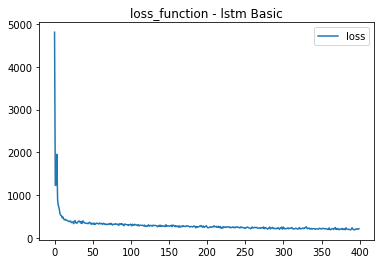

In [16]:
plt.plot(lstm_history.history["loss"])
plt.title("loss_function - lstm Basic")
plt.legend(["loss"])
plt.show()

In [17]:
#lstm_model.evaluate(X_test, y_test, verbose=0)
h = lstm_model.evaluate(X_test, y_test, verbose=0)

In [18]:
from sklearn.metrics import r2_score
predictions = lstm_model.predict(X_test)
test_r2 = r2_score(y_test, predictions)

RMSE with LSTM method =  11.96903429615029
CORR with LSTM method =  0.9275722282940247


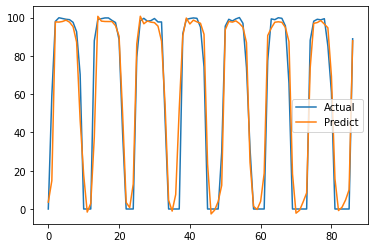

In [19]:
lstm_acc_df = pd.DataFrame()
lstm_acc_df['Actual'] = y_test
lstm_acc_df['Predict'] = predictions
lstm_acc_df.plot()
print('RMSE with LSTM method = ', h**0.5)
print('CORR with LSTM method = ', test_r2)

In [20]:
# Dumb model: SIC from previous year
prev_val = y_test[0]
sse = 0

for n in range(12, len(y_test)-1):
    err = y_test[n] - prev_val
    sq_err = err ** 2
    sse = sse + sq_err
    prev_val = y_test[n-11]

mse = sse / n
#mse

In [21]:
# Dumb model: SIC from previous year
predict = pd.DataFrame(y_test, columns = ["dumb_predict"])
predict = predict.shift(12)
predict["actual"] = y_test
predict.fillna(value=0, inplace=True)
correct_cols = ["actual", "dumb_predict"]
predict = predict.reindex(columns=correct_cols)
#predict[12:]

In [22]:
#predict[12:].plot()

In [23]:
from sklearn.metrics import r2_score
predictions = predict["dumb_predict"].values
test_r2 = r2_score(y_test[12:], predictions[12:])
#test_r2 = r2_score(y_test, predictions)
#test_r2

RMSE with SIC from Last Year =  13.507366467009208
CORR with SIC from Last Year =  0.8971819207731234


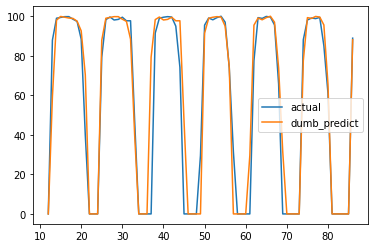

In [24]:
predict[12:].plot()
print('RMSE with SIC from Last Year = ', mse**0.5)
print('CORR with SIC from Last Year = ', test_r2)